**Decision Tree Regressor**

In [1]:
import sklearn

In [2]:
sklearn.__version__

'0.22.2.post1'

In [3]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
df_train=pd.read_csv("/content/sample_data/california_housing_train.csv")


In [5]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


VISUALIZATION

In [8]:
df_train_copy=df_train.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92ac87a940>,
      dtype=object)

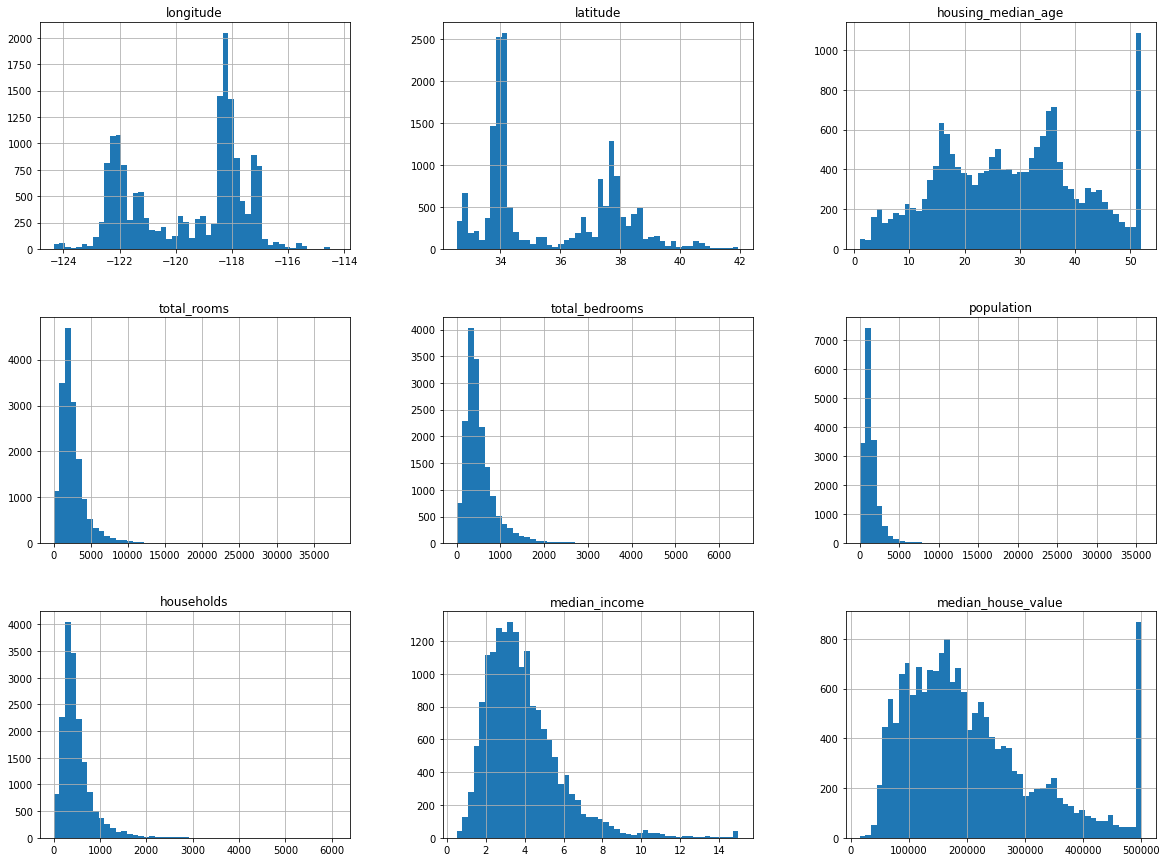

In [9]:
df_train_copy.hist(bins=50,figsize=(20,15))

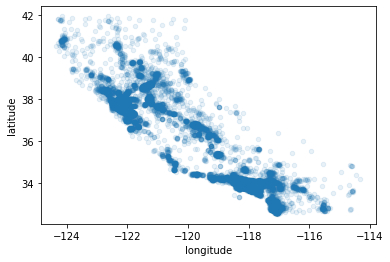

In [10]:
df_train_copy.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

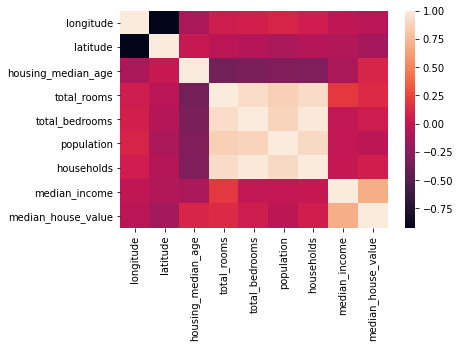

In [11]:
import seaborn as sns
corr=df_train_copy.corr()

sns.heatmap(corr)

EXPERIMENTING WITH ATTRIBUTE COMBINATIONS


In [12]:

df_train_copy["rooms_per_household"]=df_train_copy["total_rooms"]/df_train_copy["households"]
df_train_copy["bedrooms_per_room"]=df_train_copy["total_bedrooms"]/df_train_copy["total_rooms"]
df_train_copy["population_per_household"]=df_train_copy["population"]/df_train_copy["households"]

In [13]:
corr_matrix=df_train_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691871
rooms_per_household         0.150081
total_rooms                 0.130991
housing_median_age          0.106758
households                  0.061031
total_bedrooms              0.045783
population                 -0.027850
population_per_household   -0.042764
longitude                  -0.044982
latitude                   -0.144917
bedrooms_per_room          -0.258190
Name: median_house_value, dtype: float64

The new bedroom_per_room is much more correlated with the median house value than the total no. of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tends to be more expensive.

The number of rooms per household is also more informative than the total number of rooms in a district- obviously the larger the house, the more expensive they are.

**Training a model**

In [14]:
X_train=df_train.drop("median_house_value",axis=1)

In [15]:
y_train=df_train["median_house_value"]

In [16]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [17]:
y_train.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [19]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

Now that the model is trained, let's evaluate it on the training set 

In [21]:
y_preds=clf.predict(X_train)

In [22]:
from sklearn.metrics import mean_squared_error
clf_mse=mean_squared_error(y_train,y_preds)
clf_rmse=np.sqrt(clf_mse)
clf_rmse

0.0

Wait, what!? No error at all? The model has badly overfit the data.

Evalution using cross-validation

In [23]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
clf_score=np.sqrt(-scores)

In [26]:
print("score :",clf_score)
print("mean :",clf_score.mean())
print("standard deviation :",clf_score.std())

score : [135213.86475818  88458.38861683 106920.94920968  95949.51021066
  97327.68825106]
mean : 104774.08020928294
standard deviation : 16313.878207734728


OVER MODEL IS HIGHLY OVERFITTED 

FINE-TUNE MODEL BY  hyperparameter optimization

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid=[{
              'criterion' : ["mse", "friedman_mse", "mae"],
                                      'max_depth' : [2,4,6,8,10,12]}]
clf=DecisionTreeRegressor()
grid_search=GridSearchCV(clf,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['mse', 'friedman_mse', 'mae'],
                          'max_depth': [2, 4, 6, 8, 10, 12]}],
             pre_disp

In [38]:
grid_search.best_params_

{'criterion': 'mae', 'max_depth': 6}

In [41]:
final_model=grid_search.best_estimator_



In [48]:

print(tree.export_text(final_model))


|--- feature_7 <= 5.04
|   |--- feature_7 <= 2.83
|   |   |--- feature_1 <= 34.45
|   |   |   |--- feature_0 <= -117.79
|   |   |   |   |--- feature_1 <= 34.06
|   |   |   |   |   |--- feature_0 <= -118.38
|   |   |   |   |   |   |--- value: [332500.00]
|   |   |   |   |   |--- feature_0 >  -118.38
|   |   |   |   |   |   |--- value: [140700.00]
|   |   |   |   |--- feature_1 >  34.06
|   |   |   |   |   |--- feature_0 <= -118.27
|   |   |   |   |   |   |--- value: [225000.00]
|   |   |   |   |   |--- feature_0 >  -118.27
|   |   |   |   |   |   |--- value: [169500.00]
|   |   |   |--- feature_0 >  -117.79
|   |   |   |   |--- feature_0 <= -116.51
|   |   |   |   |   |--- feature_1 <= 33.58
|   |   |   |   |   |   |--- value: [129700.00]
|   |   |   |   |   |--- feature_1 >  33.58
|   |   |   |   |   |   |--- value: [95200.00]
|   |   |   |   |--- feature_0 >  -116.51
|   |   |   |   |   |--- feature_7 <= 2.32
|   |   |   |   |   |   |--- value: [63600.00]
|   |   |   |   |   |--- feat

Evaluate on test set

In [42]:
df_test=pd.read_csv("/content/sample_data/california_housing_test.csv")
df_test.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [43]:
X_test=df_test.drop("median_house_value",axis=1)
y_test=df_test["median_house_value"]

In [44]:
y_preds=final_model.predict(X_test)

final_mse=mean_squared_error(y_test,y_preds)
final_rmse=np.sqrt(final_mse)

In [45]:
final_rmse

72149.23806987616